In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
from itertools import islice
%matplotlib inline

import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn

## Getting the MNIST Data Set

We have access to a number of now standard datasets via PyTorch directly.  So to get MNIST set up, all we need to do is the following.

In [2]:
image_path = './' # just store everything to your local working directory
mnist_data_path = image_path + '/MNIST'

transform = transforms.Compose([transforms.ToTensor()])

if not os.path.isdir(mnist_data_path): # if you've already downloaded and converted the MNIST images, skip

    # Download and convert MNIST images into tensor format. 
    mnist_dataset_train = torchvision.datasets.MNIST(image_path, train=True, transform=transform, download=True)
    mnist_dataset_test = torchvision.datasets.MNIST(image_path, train=False, transform=transform, download=True)

     # Sanity check to make sure your download worke
    assert isinstance(mnist_dataset_train, torch.utils.data.Dataset)

else:
    # Download and convert MNIST images into tensor format. 
    mnist_dataset_train = torchvision.datasets.MNIST(image_path, train=True, transform=transform, download=False)
    mnist_dataset_test = torchvision.datasets.MNIST(image_path, train=False, transform=transform, download=False)



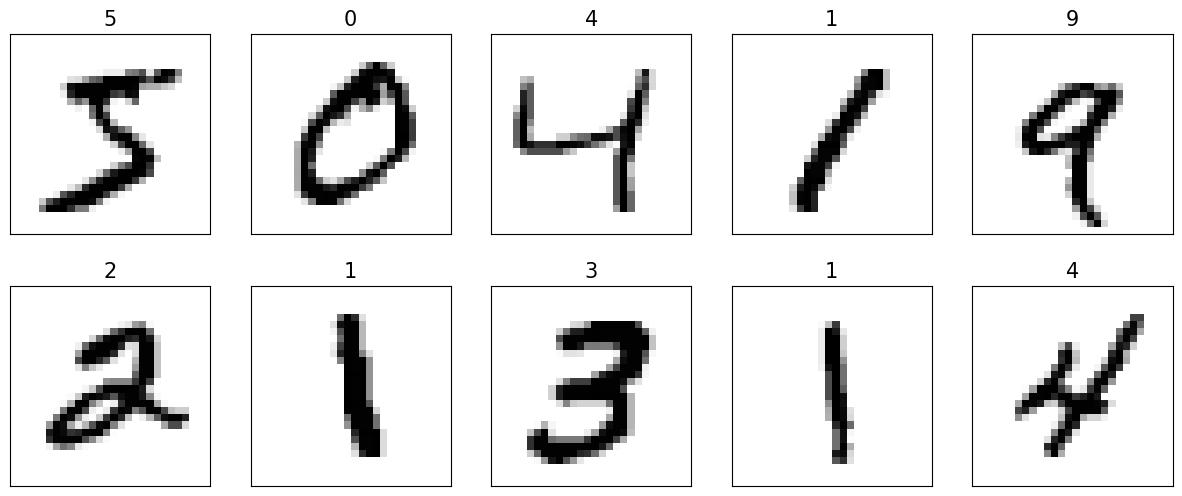

In [3]:
fig = plt.figure(figsize=(15,6))
for ii, (image, label) in islice(enumerate(mnist_dataset_train),10):
    ax = fig.add_subplot(2,5,ii+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(torch.squeeze(image,0), cmap='gray_r')
    ax.set_title(f'{label}', size=15)

Here we decide on a batch size for running Stochastic Gradient Descent and then get our training data into the proper format for iterating over epochs with a random shuffle into new batches at every iteration.  

In [4]:
batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_dataset_train, batch_size, shuffle=True)

## Building the Model

In [5]:
hidden_units = [32, 16]
image_size = mnist_dataset_train[0][0].shape
input_size = image_size[0] * image_size[1] * image_size[2]
all_layers = [nn.Flatten()] # the first thing in your list of layers is a flattening operation
for hidden_unit in hidden_units: 
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.Sigmoid())
    input_size = hidden_unit
all_layers.append(nn.Linear(hidden_units[-1], 10))
model = nn.Sequential(*all_layers) # note the "*" unpacks the list into individual entries.  Just treat as boilerplate for now.  
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=32, bias=True)
  (2): Sigmoid()
  (3): Linear(in_features=32, out_features=16, bias=True)
  (4): Sigmoid()
  (5): Linear(in_features=16, out_features=10, bias=True)
)

## Choosing the Loss Function and Optimizer

In [6]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

## Training across Epochs

In [7]:
num_epochs = 20
for epoch in range(num_epochs):
    accuracy_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward() # perform backpropagation
        optimizer.step() # optimize over the given batch
        optimizer.zero_grad() 
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist_train += is_correct.sum()
    accuracy_hist_train /= len(train_dl.dataset)
    print(f"Epoch {epoch} Accuracy {accuracy_hist_train:.4f}")

Epoch 0 Accuracy 0.6854
Epoch 1 Accuracy 0.8994
Epoch 2 Accuracy 0.9230
Epoch 3 Accuracy 0.9372
Epoch 4 Accuracy 0.9452
Epoch 5 Accuracy 0.9519
Epoch 6 Accuracy 0.9568
Epoch 7 Accuracy 0.9603
Epoch 8 Accuracy 0.9637
Epoch 9 Accuracy 0.9660
Epoch 10 Accuracy 0.9687
Epoch 11 Accuracy 0.9707
Epoch 12 Accuracy 0.9726
Epoch 13 Accuracy 0.9740
Epoch 14 Accuracy 0.9754
Epoch 15 Accuracy 0.9769
Epoch 16 Accuracy 0.9774
Epoch 17 Accuracy 0.9791
Epoch 18 Accuracy 0.9797
Epoch 19 Accuracy 0.9808


## Testing Our Trained Model 

In [10]:
test_pred = model(mnist_dataset_test.data/255.)
is_correct = (torch.argmax(test_pred, dim=1) == mnist_dataset_test.targets ).float()
print(f'Test Accuracy is: {is_correct.mean():.4f}')

Test Accuracy is: 0.9605
